In [1]:
"""
This module samples linearly separable dichotomies and uses findTeachingSet to calculate average teaching set size
"""

import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.special import comb
%run TeachingSetFind_module.ipynb

In [74]:
"""
Sample uniformly randomly from surface of hypersphere, default (scale = 1) is unit hypersphere.
Offset is defaulted to False, meaning a hypersphere centered at the origin.
"""
def sampleHypersphere(n, d, scale=1, random_offset=False, debug=False):
    
    sample = np.array([np.random.normal(0,scale,d) for i in range(n)])
    # normalize to unit hypersphere
    norm_squared = np.array(list(map(lambda x: sum(np.square(x)), sample)))
    sample = (sample.T / norm_squared).T
    
    if debug:
        print(sample)
        rand_pt = random.randrange(0,n)
        ss = 0
        for i in range(d):
            ss += sample[rand_pt][i] ** 2
        print("random data point norm squared is: ", ss)
        
    return sample

In [75]:
# calculates C(N,d), i.e. the number of homogeneously linearly separable dichotomies for N points in general position in Rd
def C(n,d):
    return 2 * sum([comb(n-1, k) for k in range(d)])

In [76]:
"""
Given a sample of points on a hypersphere, generates linearly separable patterns for the sample.
An instance of patterns corresponds to a dichotomy (hypothesis). Size specifies the number of instances requested.
Returns a list of such instances.
"""
def generateDichotomy(sample, size, n, d, homogeneous=True, debug=False):
    # print(size,2**n)
    # size of hypothesis set should be less than total number of possible hypotheses
    # if size > 2 ** n: raise ValueError('requested hypothesis set size exceeds total number of possible dichotomies')
    
    # further, size of hypothesis set should not exceed C(N,d)
    if size > C(n,d): raise ValueError('requested hypothesis set size exceeds bound of Function-Counting Theorem')
    
    hypotheses = set()
    
    # keep generating hypothesis until set size reached
    while len(hypotheses) < size:
        normal_vec = np.random.uniform(-1,1,d)
        new_hyp = [1 if np.dot(sample[i], normal_vec) > 0 else -1 for i in range(n)]
        new_hyp = tuple(new_hyp)
        # exclude duplicate
        if new_hyp not in hypotheses:
            hypotheses.add(new_hyp)

    if debug:
        print(np.array(hypotheses))
    
    return list(map(list,hypotheses))

In [77]:
"""
Given a set of patterns, calculate the average and stderr of the size of optimal teaching set
Returns [avg, stderr]
"""
def summaryTeachingSet(coordinates, hypotheses, n, d, homogeneous=True, debug=False):
    
    size = len(hypotheses)
    
    set_sizes = [len(findTeachingSet(coordinates, hyp, n, d, homogeneous=homogeneous)[0]) for hyp in hypotheses]
    
    avg = np.mean(set_sizes)
    stderr = np.std(set_sizes)
    
    return [avg, stderr]

In [78]:
N = [5,10,15,20,25,30,35,40,45,50,100,300]
def experiment(d, size):
    
    # generate random points for each n in N
    coordinates = [sampleHypersphere(n, d, debug=False) for n in N]

    # for each set of points and corresponding n, generate set of hypotheses
    hypotheses = [generateDichotomy(coordinates[i], size, N[i], d, debug=False) for i in range(len(N))]

    # for each n and corresponding hypotheses, calculate teaching set statistics
    summary = [summaryTeachingSet(coordinates[i], hypotheses[i], N[i], d) for i in range(len(N))]
    return summary

In [64]:
summary4 = experiment(d=8, size=10)

In [79]:
summary5 = experiment(d=4, size=10)

In [65]:
summary6 = experiment(d=6, size=10)

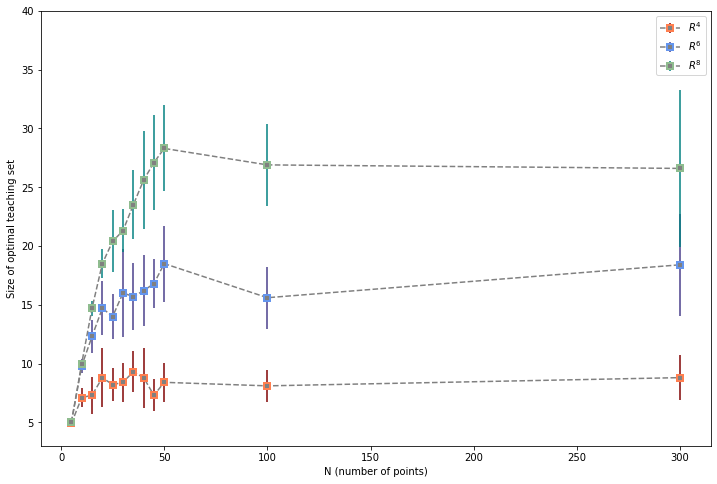

<Figure size 432x288 with 0 Axes>

In [80]:
y_d4 = [s[0] for s in summary5]
e_d4 = [s[1] for s in summary5]
y_d6 = [s[0] for s in summary6]
e_d6 = [s[1] for s in summary6]
y_d8 = [s[0] for s in summary4]
e_d8 = [s[1] for s in summary4]
plt.figure(figsize=(12,8))
plt.errorbar(N, y_d4, e_d4, marker='s', mec='coral', mew=2, linestyle='--', color='grey', ecolor='maroon')

plt.errorbar(N, y_d6, e_d6, marker='s', mec='cornflowerblue', mew=2, linestyle='--', color='grey', ecolor='darkslateblue')

plt.errorbar(N, y_d8, e_d8, marker='s', mec='darkseagreen', mew=2, linestyle='--', color='grey', ecolor='teal')
plt.legend(['$R^{}$'.format(4),'$R^{}$'.format(6),'$R^{}$'.format(8)])
plt.ylim((3,40))
plt.xlabel('N (number of points)')
plt.ylabel('Size of optimal teaching set')

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fixed_d.png', dpi=100)

In [438]:
D = [2,3,4,5,6,7,8]
N = 7*[80]
def experiment_d(size):
    
    # generate random points for each d in D
    coordinates = [sampleHypersphere(N[i], D[i], debug=False) for i in range(len(D))]

    # for each set of points and corresponding d, generate set of hypotheses
    hypotheses = [generateDichotomy(coordinates[i], size, N[i], D[i], debug=False) for i in range(len(D))]

    # for each n and corresponding hypotheses, calculate teaching set statistics
    summary = [summaryTeachingSet(coordinates[i], hypotheses[i], N[i], D[i]) for i in range(len(D))]
    return summary

def plot_d(summary, n, ylow, yhigh):
    
    y = [s[0] for s in summary]
    e = [s[1] for s in summary]
    plt.figure(figsize=(12,8))
    plt.errorbar(D, y, e, marker='s', mec='coral', mew=2, linestyle='--', color='grey', ecolor='maroon')
    plt.plot(D,2*np.array(D)*np.log(np.array(D)))
    plt.plot(D,4*np.array(D)-6)
    plt.ylim((ylow,yhigh))
    plt.xlim((1.5,8.5))
    plt.xlabel('d (dimension)')
    plt.ylabel('Size of optimal teaching set')
    plt.legend(['d * logd', 'linear in d', 'simulation result'])
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig('fixed_N.png', dpi=100)

In [431]:
summary_dd = experiment_d(size=10)

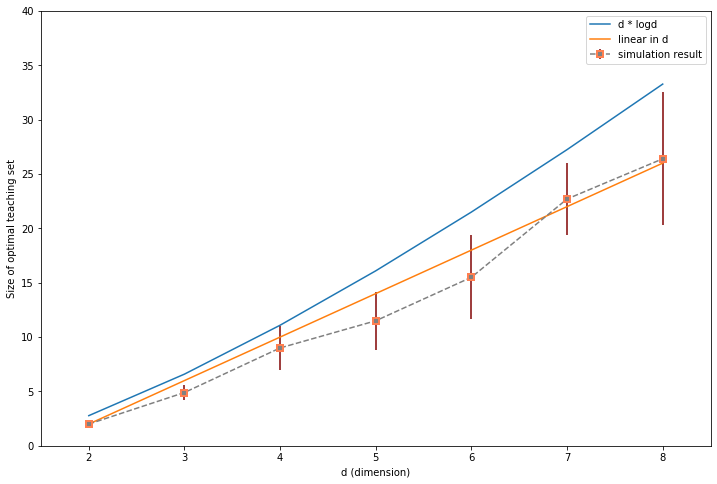

<Figure size 432x288 with 0 Axes>

In [439]:
plot_d(summary_dd, ylow=0, yhigh=40, n='80')